In [1]:
 #importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import pyplot
from pandas import Series
from datetime import datetime
import statistics
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=f53df627b7cb2182b505bbc2fc316f30f43537a642166bf71564a08560f9f9f8
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [6]:
 #loading the data into dataframes
gpu_df= pd.read_csv("/content/drive/MyDrive/Resit_Cloud_computing/gpu.csv")
app_df= pd.read_csv("/content/drive/MyDrive/Resit_Cloud_computing/application-checkpoints.csv")
task_df= pd.read_csv("/content/drive/MyDrive/Resit_Cloud_computing/task-x-y.csv")

In [ ]:
app_df.head()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [ ]:
gpu_df.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [ ]:
task_df.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [ ]:
gpu_df.shape

(1543681, 8)

In [ ]:
app_df.shape

(660400, 6)

**PREPROCESSING THE DATA**

In [ ]:
 #Converting timestamp to datetime format using specified timestamp format

TIMESTAMP_FORMAT = '%Y-%m-%dT%H:%M:%S.%fZ'

def timestamp_conv(df):
    df = pd.to_datetime(df, format=TIMESTAMP_FORMAT)
    return df

In [ ]:
 #Merging application checkpoints and tasks based on taskId and jobId
def task_merge_check(checkpoint_df, tasks_df):
    check_df = pd.merge(checkpoint_df, tasks_df, on=['taskId', 'jobId'], how='left')
    return check_df

check_df = task_merge_check(app_df, task_df)


In [ ]:
 #Transforming timestamp data for GPU records 
gpu_df['timestamp'] = timestamp_conv(gpu_df['timestamp'])
gpu_df

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 08:27:10.314,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08 08:27:10.192,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08 08:27:10.842,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08 08:27:10.424,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08 08:27:10.937,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47
...,...,...,...,...,...,...,...,...
1543676,2018-11-08 08:31:18.873,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.99,30,0,0
1543677,2018-11-08 08:31:24.933,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.90,29,0,0
1543678,2018-11-08 08:31:32.998,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.88,29,0,0
1543679,2018-11-08 08:31:39.057,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,26.89,29,0,0


In [ ]:
#Modifying timestamp format for merged data (application checkpoint and task)
check_df['timestamp'] = timestamp_conv(check_df['timestamp'])
check_df

,timestamp,hostname,eventName,eventType,jobId,taskId,x,y,level
0,2018-11-08 07:41:55.921,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043,2,10,12
1,2018-11-08 07:42:29.842,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
2,2018-11-08 07:42:29.845,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
3,2018-11-08 07:42:29.845,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
4,2018-11-08 07:43:13.957,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,238,4,12
...,...,...,...,...,...,...,...,...,...
660395,2018-11-08 08:30:10.296,0745914f4de046078517041d70b22fe700000I,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd,33,217,12
660396,2018-11-08 08:30:10.325,0745914f4de046078517041d70b22fe700000I,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8261c0ff-03d6-48b3-a50f-da41cb3291fd,33,217,12
660397,2018-11-08 08:30:14.081,a77ef58b13ad4c01b769dac8409af3f800000H,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099,85,103,12
660398,2018-11-08 08:30:14.127,a77ef58b13ad4c01b769dac8409af3f800000H,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,ce97e3e9-494a-43a7-aa85-edd2db4cf099,85,103,12


In [ ]:
def gpu_merge_final(data_gpu,  one_merge):
# Merging GPU and application checkpoints data by matching timestamp and hostname (inner join)

    merge_gpu_app = data_gpu.merge(one_merge,on=['timestamp'], how='inner')
    return (merge_gpu_app)
merged_df = gpu_merge_final(gpu_df, check_df)

In [ ]:
merged_df

,timestamp,hostname_x,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,hostname_y,eventName,eventType,jobId,taskId,x,y,level
0,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,32,174,12
1,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,32,174,12
2,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,167,224,12
3,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,167,224,12
4,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,248,255,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337685,2018-11-08 08:24:23.967,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8784602b-8752-46c9-8be3-dce695cad495,98,153,12
337686,2018-11-08 08:27:49.025,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,43.15,38,0,0,5903af3699134795af7eafc605ae5fc700000X,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83940c2d-f3e3-45c3-a58c-9e8d5277bc1c,161,181,12
337687,2018-11-08 08:27:49.025,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,43.15,38,0,0,5903af3699134795af7eafc605ae5fc700000X,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,83940c2d-f3e3-45c3-a58c-9e8d5277bc1c,161,181,12
337688,2018-11-08 08:29:58.159,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,27.27,32,0,0,4a79b6d2616049edbf06c6aa58ab426a00000X,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,2c429cac-7be1-4c04-be01-50bd48bedcfe,55,251,12


In [ ]:
merged_df.shape

(337690, 16)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337690 entries, 0 to 337689
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       337690 non-null  datetime64[ns]
 1   hostname_x      337690 non-null  object        
 2   gpuSerial       337690 non-null  int64         
 3   gpuUUID         337690 non-null  object        
 4   powerDrawWatt   337690 non-null  float64       
 5   gpuTempC        337690 non-null  int64         
 6   gpuUtilPerc     337690 non-null  int64         
 7   gpuMemUtilPerc  337690 non-null  int64         
 8   hostname_y      337690 non-null  object        
 9   eventName       337690 non-null  object        
 10  eventType       337690 non-null  object        
 11  jobId           337690 non-null  object        
 12  taskId          337690 non-null  object        
 13  x               337690 non-null  int64         
 14  y               337690 non-null  int

In [ ]:
merged_df.describe()

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,x,y,level
count,3.376900e+05,337690.000000,337690.000000,337690.000000,337690.000000,337690.000000,337690.000000,337690.000000
mean,3.239881e+11,91.628663,40.421979,65.419050,34.701857,127.147917,126.718218,11.984092
std,1.222540e+09,38.628662,3.454046,40.363216,22.488013,74.099186,73.989530,0.252879
min,3.201181e+11,22.770000,26.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,3.236170e+11,47.390000,38.000000,0.000000,0.000000,63.000000,63.000000,12.000000
50%,3.236170e+11,98.370000,40.000000,90.000000,44.000000,127.000000,127.000000,12.000000
75%,3.250170e+11,122.510000,42.000000,92.000000,51.000000,191.000000,191.000000,12.000000
max,3.252171e+11,195.830000,55.000000,100.000000,83.000000,255.000000,255.000000,12.000000


In [ ]:
merged_df['eventType'].value_counts()

START    169390
STOP     168300
Name: eventType, dtype: int64

In [ ]:
(merged_df['eventName']).value_counts()

TotalRender      67756
Saving Config    67684
Uploading        67644
Render           67332
Tiling           67274
Name: eventName, dtype: int64

**EXPLORATORY DATA ANALYSIS**

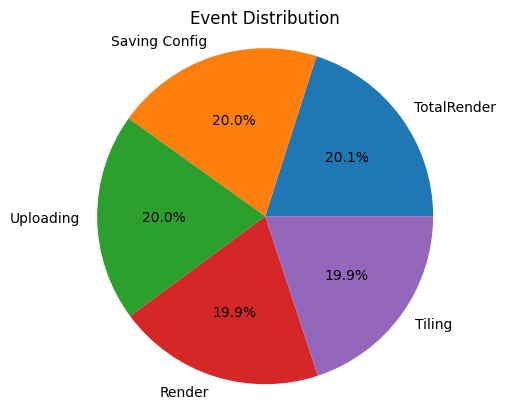

In [ ]:
#Visualizing event distribution using a pie chart
event_counts = merged_df['eventName'].value_counts()
plt.pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%')
plt.title('Event Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Separating begin and end time into different columns and calculate time taken

begin_df = merged_df.loc[merged_df['eventType'] == 'START'].copy()
end_df = merged_df.loc[merged_df['eventType'] == 'STOP'].copy()

begin_df = begin_df.rename(columns={"timestamp": "start_time"}).drop('eventType', axis=1)
end_df = end_df.rename(columns={"timestamp": "stop_time"}).drop('eventType', axis=1)

df = pd.merge(begin_df, end_df, on=['eventName', 'x', 'y', 'level'])

df['time_taken'] = (df['stop_time'] - df['start_time']).dt.total_seconds()
df

,start_time,hostname_x_x,gpuSerial_x,gpuUUID_x,powerDrawWatt_x,gpuTempC_x,gpuUtilPerc_x,gpuMemUtilPerc_x,hostname_y_x,eventName,...,gpuSerial_y,gpuUUID_y,powerDrawWatt_y,gpuTempC_y,gpuUtilPerc_y,gpuMemUtilPerc_y,hostname_y_y,jobId_y,taskId_y,time_taken
0,2018-11-08 08:27:10.875,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40,265232c5f6814768aeefa66a7bec6ff6000010,Uploading,...,324917052614,GPU-bc05182a-0194-740f-827e-851d9ae28136,40.97,35,0,0,265232c5f6814768aeefa66a7bec6ff6000010,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0fea60cb-e10d-4879-a50d-9c20926f50af,1.121
1,2018-11-08 08:27:10.624,b9a1fa7ae2f74eb68f25f607980f97d700000B,324917052053,GPU-cd9e7193-8237-4e36-aa41-f5e30f10044a,88.47,40,91,48,04dc4e9647154250beeee51b866b0715000014,Render,...,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,43.79,37,0,0,04dc4e9647154250beeee51b866b0715000014,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,46496dde-fa77-4395-8cda-8705561b32dc,46.741
2,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,323617020155,GPU-51b7ec74-a5ac-06b7-1fd0-9c11ce579ffc,28.05,39,0,0,6139a35676de44d6b61ec247f0ed8657000009,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,1.032
3,2018-11-08 08:27:10.359,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52,6139a35676de44d6b61ec247f0ed8657000009,Uploading,...,325117172395,GPU-50f23433-71f3-6f16-3c86-0de884dc7493,44.21,37,0,0,6139a35676de44d6b61ec247f0ed8657000009,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,723b6fff-9d27-4b67-8b9d-ae40a501b1bc,1.032
4,2018-11-08 08:27:10.678,83ea61ac1ef54f27a3bf7bd0f41ecaa700000T,323617021291,GPU-fa23937e-9287-a4f8-f648-3787bfa31054,71.59,41,89,42,6139a35676de44d6b61ec247f0ed865700001D,Render,...,323617043161,GPU-82ba6a59-510a-9995-4167-0945785066b3,27.05,35,0,0,6139a35676de44d6b61ec247f0ed865700001D,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,7e65b2da-9580-4475-8d39-7938a2975fb0,47.483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86628,2018-11-08 08:05:49.714,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,04dc4e9647154250beeee51b866b0715000014,TotalRender,...,323617020277,GPU-636b97cd-9ff5-cbf0-9b18-e462e3b8a6fb,88.59,39,94,47,04dc4e9647154250beeee51b866b0715000014,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8b8faa57-c9ec-4eb0-99b9-9bd6ef77e074,48.771
86629,2018-11-08 08:05:49.714,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,97.68,41,91,57,6139a35676de44d6b61ec247f0ed865700001A,Render,...,324917053014,GPU-fd95a940-581a-15ac-2e82-96c00f9e1a9a,122.93,47,92,45,6139a35676de44d6b61ec247f0ed865700001A,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,fa0834da-3d07-417a-b5ce-a84345f84f91,23.929
86630,2018-11-08 08:18:00.161,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,70.32,37,81,29,265232c5f6814768aeefa66a7bec6ff600000U,Tiling,...,325217086360,GPU-13ba9276-da7a-8225-3302-c800e4c8ff07,96.21,39,92,43,265232c5f6814768aeefa66a7bec6ff600000U,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,0063a2c3-6bf9-4023-b808-cfc11d3dbc1d,0.972
86631,2018-11-08 08:24:23.967,0d56a730076643d585f77e00d2d8521a00000N,325217086221,GPU-1265fef9-aea4-4a5e-8a63-cc5af7b19f4f,124.28,39,89,45,6139a35676de44d6b61ec247f0ed8657000017,Saving Config,...,323617043182,GPU-78dfd50b-ffc4-bc85-3ab3-ac3a460d98bb,114.68,44,94,57,6139a35676de44d6b61ec247f0ed8657000017,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,8784602b-8752-46c9-8be3-dce695cad495,0.002


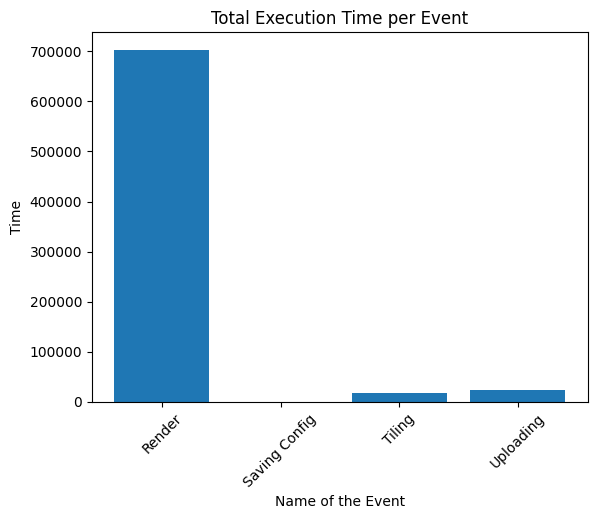

In [ ]:
#Calculating total execution time per event and visualize using a bar chart
event_time_taken = df[df['eventName'] != 'TotalRender'].groupby('eventName').apply(lambda x: x['stop_time'] - x['start_time'])
total_events = event_time_taken.groupby('eventName').sum()

plt.bar(total_events.index, total_events.dt.total_seconds())
plt.xlabel('Name of the Event')
plt.ylabel('Time')
plt.title('Total Execution Time per Event')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Assigning GPU temperature and power draw data to variables
variable_a = gpu_df.gpuTempC
variable_b = gpu_df.powerDrawWatt

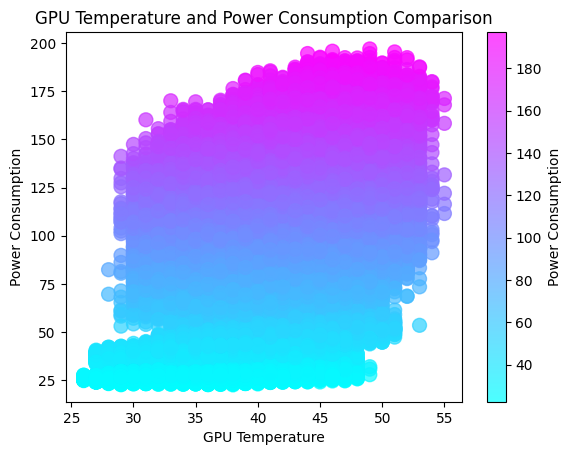

In [ ]:
#Visualizing the comaprison of GPU temperature and power consumption using a scatter plot
plt.scatter(variable_a, variable_b, c=variable_b, s=100, cmap='cool', alpha=0.7)
plt.colorbar(label='Power Consumption')
plt.xlabel('GPU Temperature')
plt.ylabel('Power Consumption')
plt.title('GPU Temperature and Power Consumption Comparison')
plt.show()

In [ ]:
# Assigning gpu memory utility % and utility %  to variables
variable_a = gpu_df.gpuMemUtilPerc
variable_b = gpu_df.gpuUtilPerc

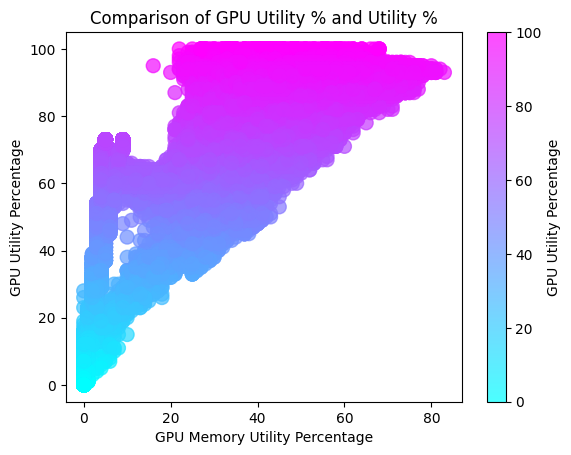

In [ ]:
#Visualizing the compariosn of GPU memory utility percentage and overall GPU utility percentage using a scatter plot
plt.scatter(variable_a, variable_b, c=variable_b, s=100, cmap='cool', alpha=0.7)
plt.colorbar(label='GPU Utility Percentage')
plt.xlabel('GPU Memory Utility Percentage')
plt.ylabel('GPU Utility Percentage')
plt.title('Comparison of GPU Utility % and Utility %')
plt.show()


In [ ]:
# Assigning gpu memory utility % and utility % as to variables for plotting
variable_a= gpu_df.gpuTempC
variable_b= gpu_df.gpuUtilPerc

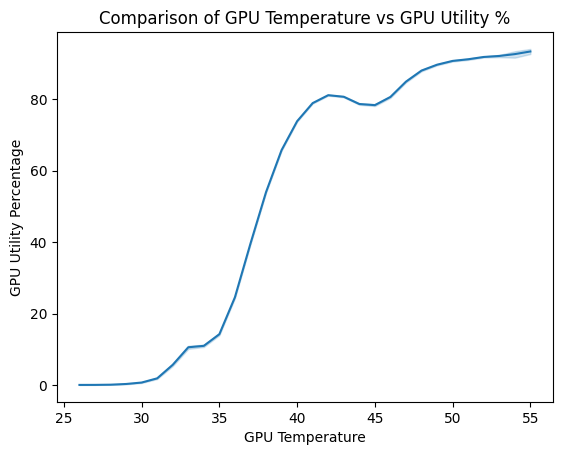

In [ ]:
#Visualizing the comparison between GPU temperature and GPU utility percentage using a line plot
sns.lineplot(x=variable_a, y=variable_b)
plt.xlabel('GPU Temperature')
plt.ylabel('GPU Utility Percentage')
plt.title('Comparison of GPU Temperature vs GPU Utility %')
plt.show()

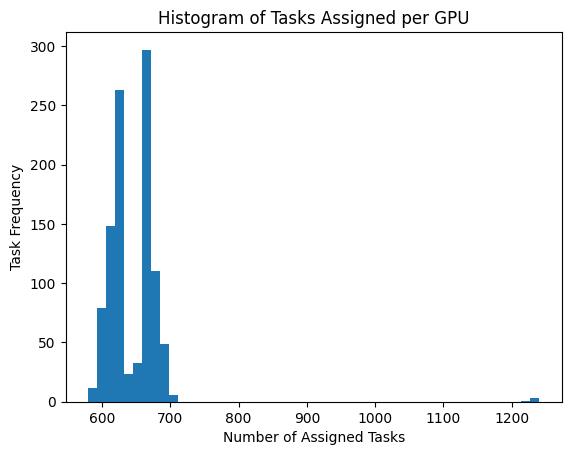

In [ ]:
#Visualizing the distribution of assigned tasks per GPU using a histogram
plt.hist(check_df['hostname'].value_counts(), bins=50)
plt.xlabel('Number of Assigned Tasks')
plt.ylabel('Task Frequency')
plt.title('Histogram of Tasks Assigned per GPU')
plt.rcParams['figure.figsize'] = [15, 8]
plt.show()


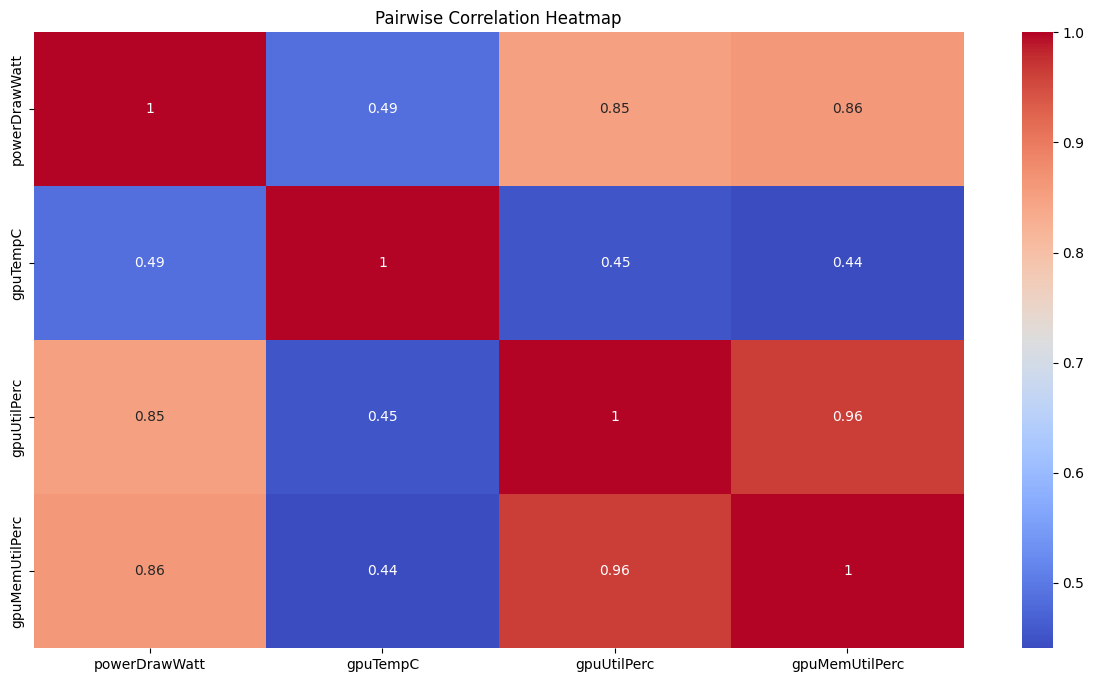

In [ ]:
#Visualizing pairwise correlation between variables using a heatmap
matrix_corr = merged_df.iloc[:, 4:8]
sns.heatmap(matrix_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Pairwise Correlation Heatmap')
plt.show()

                powerDrawWatt  gpuTempC  gpuUtilPerc  gpuMemUtilPerc
powerDrawWatt        1.000000  0.537191     0.862673        0.870745
gpuTempC             0.537191  1.000000     0.505906        0.492783
gpuUtilPerc          0.862673  0.505906     1.000000        0.966571
gpuMemUtilPerc       0.870745  0.492783     0.966571        1.000000


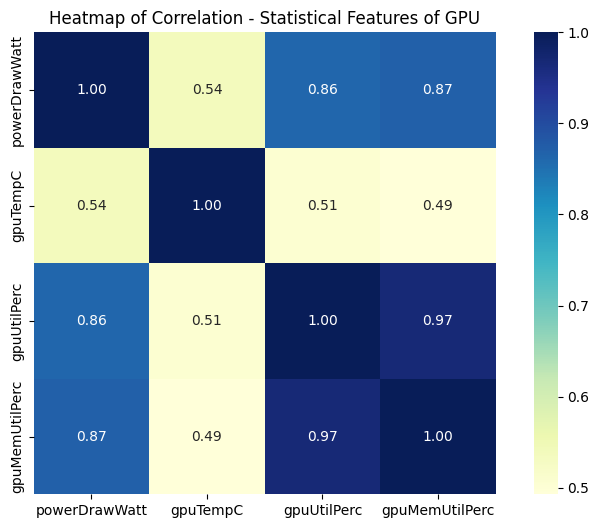

In [ ]:
# Finding correlation between numerical columns of GPU data and visualize it using a heatmap
correlation_gpu = gpu_df.iloc[:,4:8]
print(correlation_gpu.corr())

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_gpu.corr(), cmap='YlGnBu', square=True, annot=True, fmt='.2f')
plt.title('Heatmap of Correlation - Statistical Features of GPU')
plt.show()

<Figure size 1000x800 with 0 Axes>

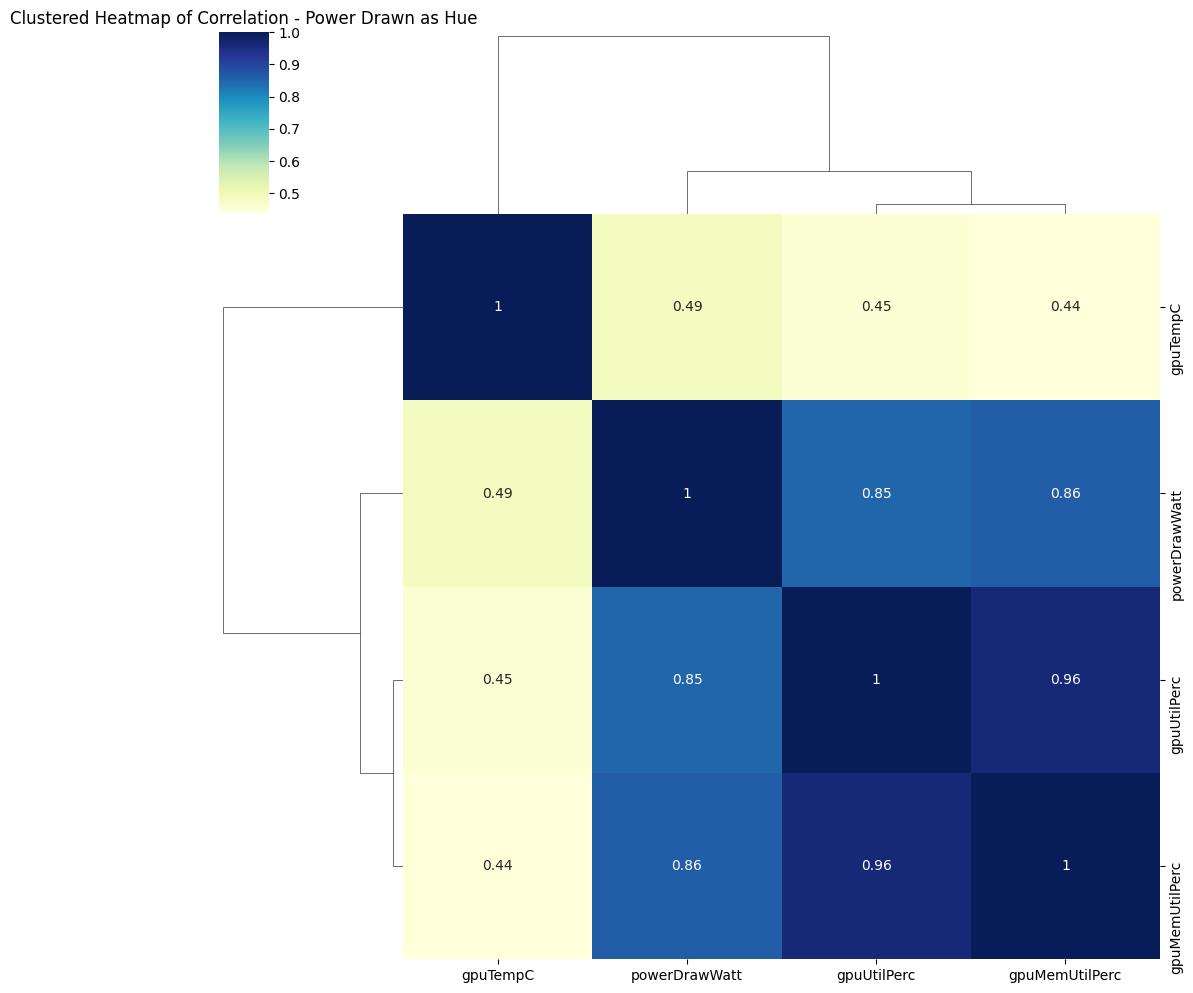

In [ ]:
#Computing correlation matrix and generating a clustered heatmap visualizing the correlations, with power drawn as the hue
correlation_matrix = matrix_corr.corr()

plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, cmap='YlGnBu', annot=True)
plt.title('Clustered Heatmap of Correlation - Power Drawn as Hue')
plt.show()


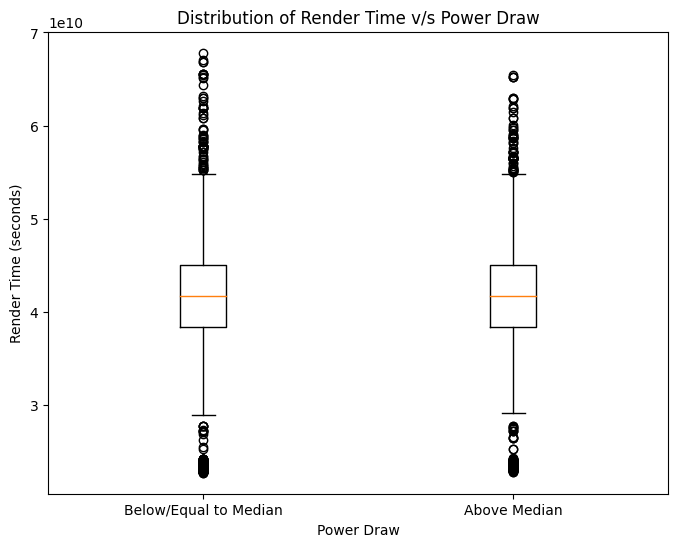

In [ ]:
#Calculating the median power draw, filtering data for render events based on power draw, calculating render times, creating a box plot for render time

median_pow = statistics.median(df['powerDrawWatt_x'])

render_under = df[
(df['powerDrawWatt_x'] <= median_pow) &
(df['eventName'] == 'Render')].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)

render_above = df[
(df['powerDrawWatt_x'] > median_pow) &
(df['eventName'] == 'Render')].groupby(
['eventName']).apply(lambda x: x.stop_time - x.start_time)
labels = ['Below/Equal to Median', 'Above Median']
plt.figure(figsize=(8, 6))
plt.boxplot([render_under.sum(), render_above.sum()])
plt.title('Distribution of Render Time v/s Power Draw')
plt.ylabel('Render Time (seconds)')
plt.xlabel('Power Draw')
plt.xticks([1, 2], labels)
plt.show()


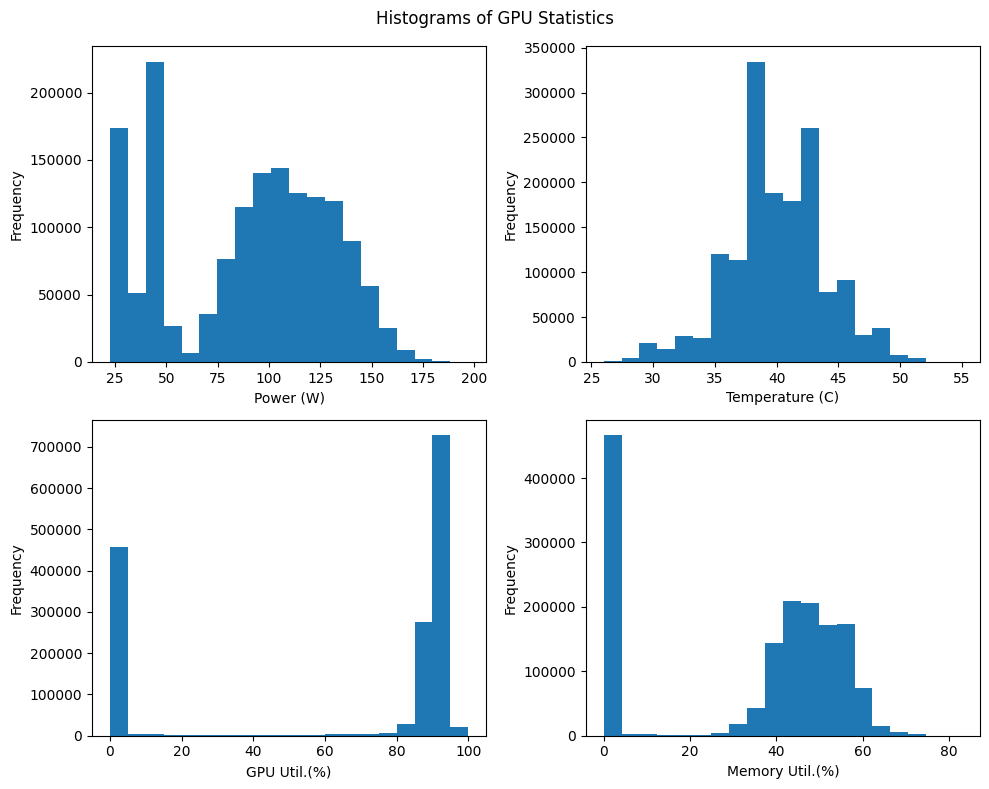

In [ ]:
# Analyzing GPU hardware performance through histogram.
statistic_gpu = ['Power (W)', 'Temperature (C)', 'GPU Util.(%)', 'Memory Util.(%)']
data = [gpu_df['powerDrawWatt'], gpu_df['gpuTempC'], gpu_df['gpuUtilPerc'], gpu_df['gpuMemUtilPerc']]

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.hist(data[i], bins=20)
    ax.set_xlabel(statistic_gpu[i])
    ax.set_ylabel('Frequency')
fig.suptitle('Histograms of GPU Statistics')
plt.tight_layout()

# Saving image
# plt.savefig('Images/histograms.png')

plt.show()


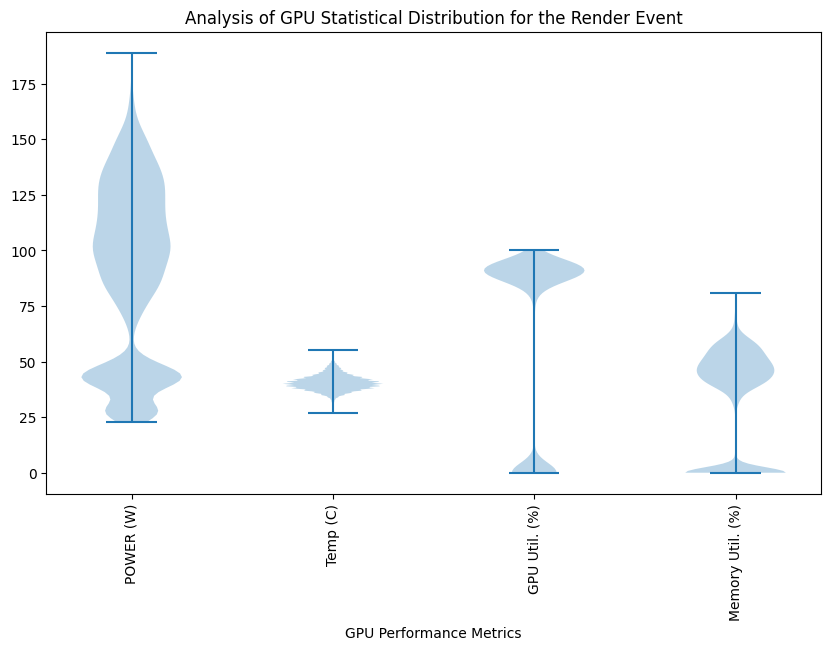

In [ ]:
# Extracting GPU performance metrics for the Render event into separate variables
statistic_gpu = ['POWER (W)', 'Temp (C)', 'GPU Util. (%)', 'Memory Util. (%)']
render_stats = {
    'POWER': merged_df[merged_df['eventName'] == 'Render']['powerDrawWatt'],
    'TEMP': merged_df[merged_df['eventName'] == 'Render']['gpuTempC'],
    'gpu_utility': merged_df[merged_df['eventName'] == 'Render']['gpuUtilPerc'],
    'memory_utility': merged_df[merged_df['eventName'] == 'Render']['gpuMemUtilPerc']
}

# Visualizing the distribution of GPU performance metrics for the Render event using a box plot
plt.figure(figsize=(10, 6))
plt.violinplot(render_stats.values())
plt.title('Analysis of GPU Statistical Distribution for the Render Event')
plt.xlabel('GPU Performance Metrics')
plt.xticks([i+1 for i, _ in enumerate(statistic_gpu)], statistic_gpu, rotation='vertical')
plt.show()


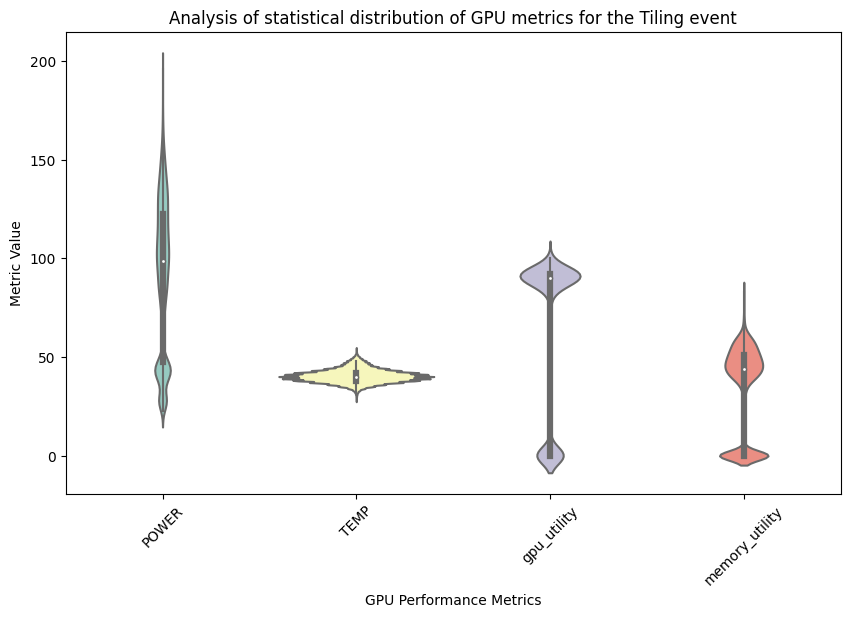

In [ ]:
#Computing and visualizing the statistical distribution of GPU metrics for the Tiling event using a violin plot.
stats_til = {
    'POWER': merged_df[merged_df['eventName'] == 'Tiling']['powerDrawWatt'],
    'TEMP': merged_df[merged_df['eventName'] == 'Tiling']['gpuTempC'],
    'gpu_utility': merged_df[merged_df['eventName'] == 'Tiling']['gpuUtilPerc'],
    'memory_utility': merged_df[merged_df['eventName'] == 'Tiling']['gpuMemUtilPerc']
}

til_df = pd.DataFrame(stats_til)

plt.figure(figsize=(10, 6))
sns.violinplot(data=til_df, palette='Set3')
plt.title('Analysis of statistical distribution of GPU metrics for the Tiling event')
plt.xlabel('GPU Performance Metrics')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()

<ipython-input-40-b9dc11820d15>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gpu_df['powerDrawWatt'], color='midnightblue', shade=True)


Text(0, 0.5, 'Density')

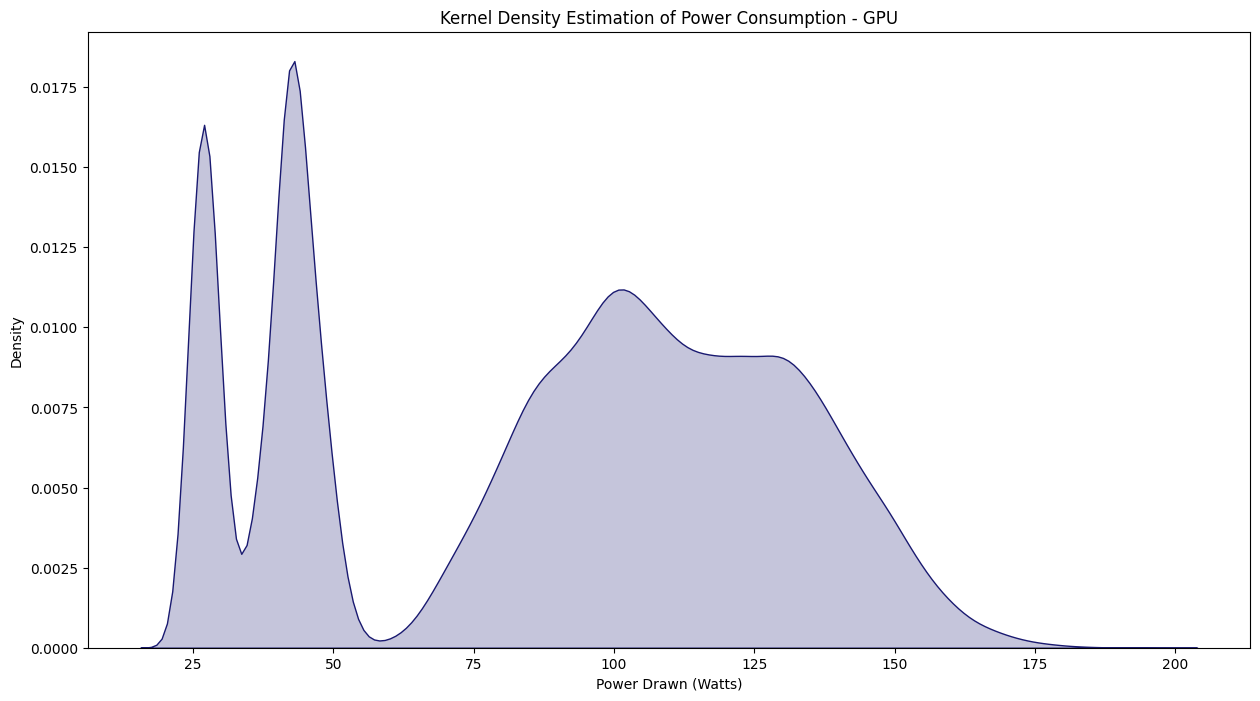

In [ ]:
#KDE plot to visualize the power consumption distribution of the GPU
plt.subplot(1, 1, 1)
sns.kdeplot(gpu_df['powerDrawWatt'], color='midnightblue', shade=True)
plt.title('Kernel Density Estimation of Power Consumption - GPU')
plt.xlabel('Power Drawn (Watts)')
plt.ylabel('Density')